# The Best Neighborhood in Pittsburgh

## Introduction

After looking through the datasets provided by the WPRDC, we decided to use civilian development as our metric for determining the best neighborhood in Pittsburgh. 

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Civilian Development is a measure of how well a neighborhood supports the daily lives, wellbeing, and experiences of the people who live there. Instead of focusing on things like income or crime, this metric looks at community-facing resources that directly improve quality of life.
Therefore, we narrowed down the three factors for determining the neighborhood with the best civilian development to:

* Number of Parks
* Number of Playgrounds
* Amount of Unused City-Held Property

### Number of Parks

Public parks are important for a city’s well being; if a neighborhood can afford clean, plentiful, and maintained public parks, that’s an excellent indicator of a community that has trust in itself. 

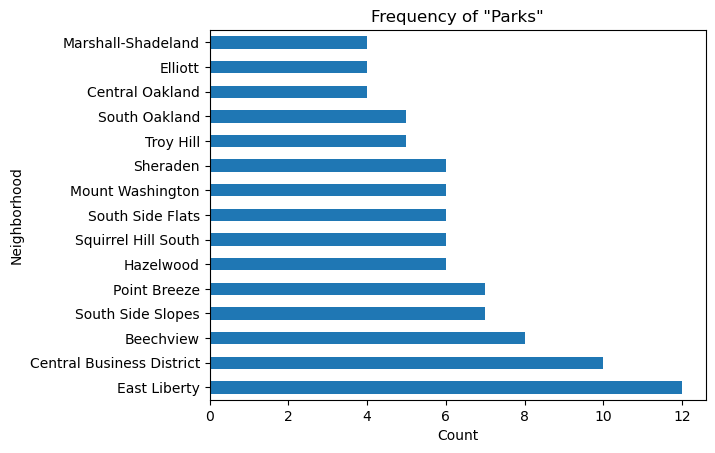

In [5]:
data = pd.read_csv("parks.csv")
dataF = data[data["type"] == "Park"]
dataP = dataF["neighborhood"].value_counts().nlargest(15)
dataForAll = data["neighborhood"].value_counts().nlargest(15)
#plot all Park graph
dataForAll.plot(kind='barh')
plt.title('Frequency of "Parks"')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()
#print (dataP)

The initial dataset included several statistics that weren’t quite parks, such as traffic islands and building grounds, leading to a dataset that wasn’t quite in line with what we were looking for.


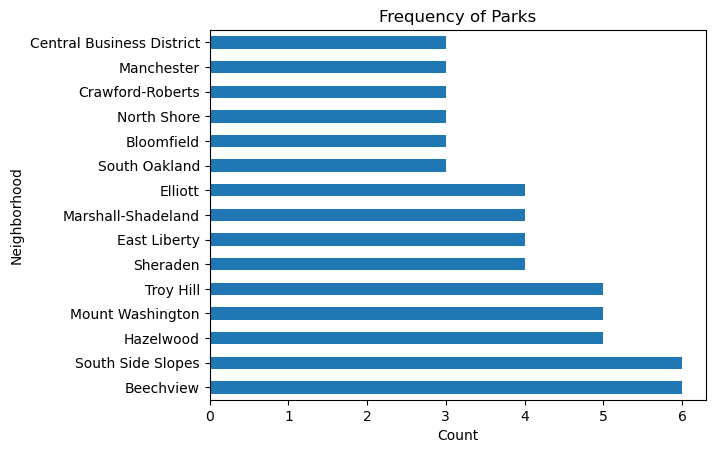

In [6]:
# Plot the only Park graph
dataP.plot(kind='barh')
plt.title('Frequency of Parks')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()



These lines of code get the amount of parks each neighborhood had. Filtered out are any parks that are memorials, traffic island, or some other non-park.

Beechview and South Side Slopes have the most parks, with 6

1. Beechview
2. South Side Slopes
3. Hazelwood
4. Mount Washington
5. Troy Hill


### Number of Playgrounds 

Playgrounds encourage exercise and outdoor time within neighborhoods and the number of playgrounds in a neighborhood can indicate that the city is putting resources into family services, public safety, and recreational spaces in that neighborhood. The dataset therefore allows us to get a realistic picture of how well a neighborhood supports its residents, particularly families, and how strong its civilian development is.


First I'll start by filtering out the necessary data from the dataset. Initially, I assumed that the necessary data would be the names of the parks and the neighborhoods they are located in. However, the dataset offered me the opportunity to broaden what I thought I'd be able to do, allowing me to also evaluate the safety of these playgrounds. I will be doing so by taking into consideration the surface type at these playgrounds, filtering out all the playgrounds that have null values under the field "safety surface type" and therefore making the assumption that the best neighborhood with good civilian development would prioritize the safety of playground users by having safety surfaces.

In [7]:
playgrounds= pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
df = playgrounds[["id", "name", "neighborhood", "safety_surface_type" ]]
print(df)

             id                          name         neighborhood  \
0    1780722587          Able Long Playground            Beechview   
1     702514290         North Ave. Playground     Allegheny Center   
2    1267038491  Vietnam Veteran's Playground  Squirrel Hill South   
3      14898932  Schenley Overlook Playground  Squirrel Hill South   
4     204832406  Schenley Overlook Playground  Squirrel Hill South   
..          ...                           ...                  ...   
440  1301777506          Granville Playground     Crawford-Roberts   
441  1828281616          Granville Playground     Crawford-Roberts   
442   904290786  Spring Garden Ave Playground       East Allegheny   
443   370549255  Spring Garden Ave Playground       East Allegheny   
444   405052526  Spring Garden Ave Playground       East Allegheny   

       safety_surface_type  
0            Pour in Place  
1              SofSurfaces  
2              SofSurfaces  
3              SofSurfaces  
4             

In [8]:
dfsafe=df.dropna(subset=["safety_surface_type"])
print(dfsafe)
#filtering the playgrounds that don't have safe surfaces

             id                          name         neighborhood  \
0    1780722587          Able Long Playground            Beechview   
1     702514290         North Ave. Playground     Allegheny Center   
2    1267038491  Vietnam Veteran's Playground  Squirrel Hill South   
3      14898932  Schenley Overlook Playground  Squirrel Hill South   
4     204832406  Schenley Overlook Playground  Squirrel Hill South   
..          ...                           ...                  ...   
440  1301777506          Granville Playground     Crawford-Roberts   
441  1828281616          Granville Playground     Crawford-Roberts   
442   904290786  Spring Garden Ave Playground       East Allegheny   
443   370549255  Spring Garden Ave Playground       East Allegheny   
444   405052526  Spring Garden Ave Playground       East Allegheny   

       safety_surface_type  
0            Pour in Place  
1              SofSurfaces  
2              SofSurfaces  
3              SofSurfaces  
4             

I then counted how many times each neighborhood with playgrounds with safe surfaces appeared within the dataset and plotted this in a bar graph.


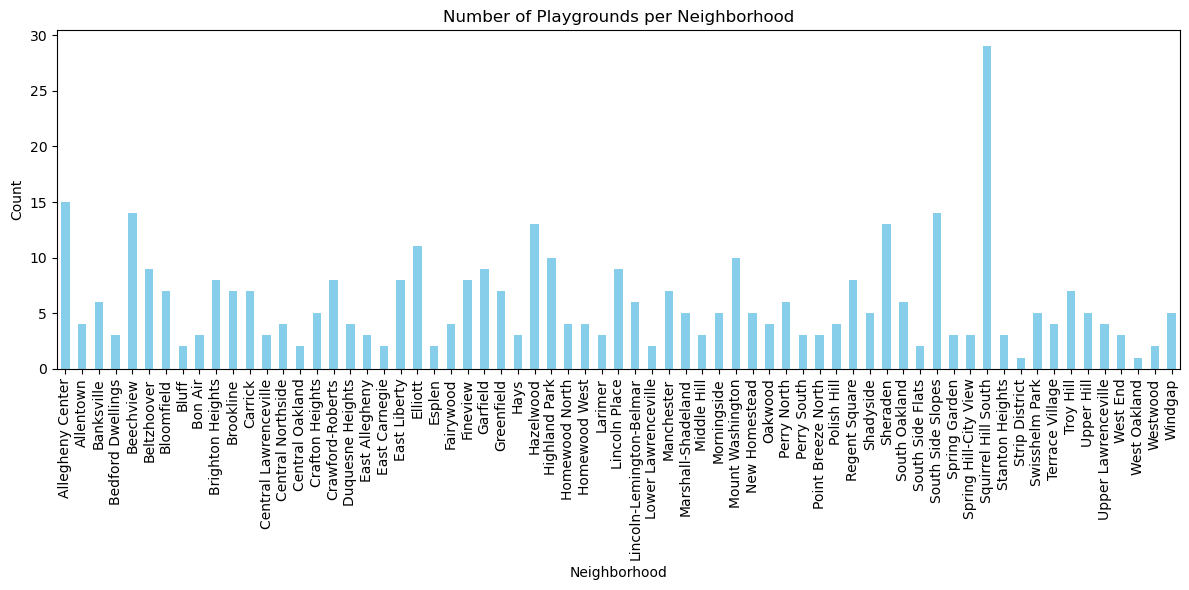

In [9]:
neighborhood_counts = dfsafe.groupby("neighborhood")["name"].count()
neighborhood_counts.plot(kind="bar", figsize=(12, 6), color='skyblue')
plt.title("Number of Playgrounds per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Through the graph we can see that Squirrel Hill South has the most playgrounds by far but how many playgrounds do the next four neighborhoods have?

In [10]:
dffinal = dfsafe.groupby("neighborhood").count().loc[:, "name"]
top5 = dffinal.sort_values(ascending=False).head(5)
print(top5)

neighborhood
Squirrel Hill South    29
Allegheny Center       15
Beechview              14
South Side Slopes      14
Hazelwood              13
Name: name, dtype: int64


### Amount of Unused City Held Property

Finally, I'm analyzing the amount of property that is on sale by the city. This means that the property is not in use, and it also isn't maintained. I start by setting up the data so that it can be processed more easily. I think that a good neighborhood has a small amount of unworked property, and if the city is analyzing it or putting it up for sale, then it is probably not maintained.

In [11]:
data = pd.read_csv("citystuffs.csv")

Now, the property that isn't in use is anything that has its 'inventory_type' at either hold for study or public sale. Other examples of inventory types include parks, but that's not what we're looking at.

In [12]:
items = pd.DataFrame(columns=data.columns.tolist())
items2 = pd.DataFrame(columns=data.columns.tolist())
i = 0
for index, row in data.iterrows():
    if row['inventory_type'] ==  'Hold For Study' or row['inventory_type'] == 'Public Sale':
        items2.loc[i] = row
        i = i+1

The below chart shows what the top 5 neighborhoods by this metric, with Arlington Heights and Friendship being the best.

In [13]:
items2['neighborhood_name'].value_counts().tail()

neighborhood_name
Central Lawrenceville    3
North Oakland            2
Glen Hazel               2
Arlington Heights        1
Friendship               1
Name: count, dtype: int64

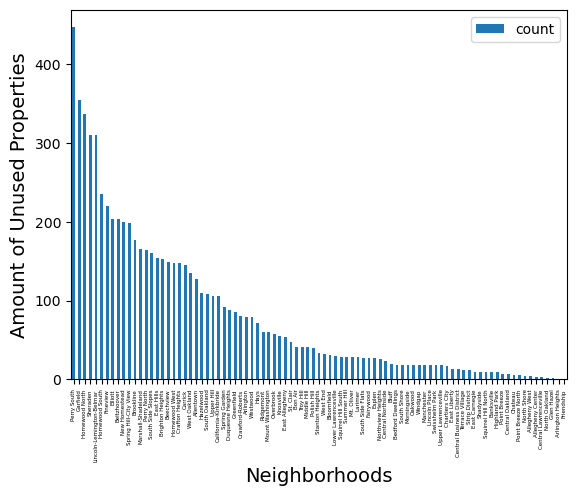

In [17]:
df = pd.DataFrame(items2["neighborhood_name"].value_counts())

df.plot(kind='bar', edgecolor='white', linewidth=0)
plt.xticks(fontsize=4)
plt.xlabel("Neighborhoods", fontsize=14)          
plt.ylabel("Amount of Unused Properties", fontsize=14)  
plt.show()

The above graph is able to compare the number of unused properties on all 89 Pittsburgh neighborhoods.

A good neighborhood in our opinion will be around the middle of this data set, having enough property for sale that someone has a wider selection of options, but not too much unused property that the neighborhood feels empty. According to this, the best five are Polish Hill, Stanton Heights, West End, Bloomfield, and Lower Lawrenceville. The average number of unused properties is approximately 80 properties.
Therefore, the best neighborhood by this metric is West End.


## Conclusion

When we look at the top 5 of the first two metrics, the cities that overlap on the top five lists are: Hazelwood, South Side Slopes, and Beechview. However, these three all line up in the back half of the third category, with the statistics to the left:

In [18]:
data = {
    "Neighborhood": ["Hazelwood", "South Side Slopes", "Beachview"],
    "Parks": [5, 6, 6],
    "Playgrounds": [13, 14, 14],
    "Other": [110, 161, 149]
}

df = pd.DataFrame(data)
print(df)

        Neighborhood  Parks  Playgrounds  Other
0          Hazelwood      5           13    110
1  South Side Slopes      6           14    161
2          Beachview      6           14    149
